In [1]:
#importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import spearmanr

%matplotlib inline

In [2]:
#importing data into the notebook
df = pd.read_excel('healthcare.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Performing preliminary data inspection on the dataset 

In [3]:
df.shape

(303, 14)

In [4]:
df.size

4242

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
duplicate=df.duplicated()
duplicate.sum()

1

There is no null values in the dataset but there is a duplicate row

# Treating the duplicate values 

In [9]:
df.drop_duplicates(inplace = True)

# preliminary statistical summary of the data(CENTRAL TENDENCIES & SPREAD)

In [10]:
def calculate_central_tendencies(df):
    mean = np.mean(df)
    median = np.median(df)
    mode = stats.mode(df).mode[0]
    return mean, median, mode

mean, median, mode = calculate_central_tendencies(df)

print("Central Tendencies:")
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)



Central Tendencies:
Mean: age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64
Median: 1.0
Mode: [ 58.   1.   0. 120. 197.   0.   1. 162.   0.   0.   2.   0.   2.   1.]


d:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\chaur\AppData\Local\Temp\ipykernel_8800\2594970529.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df).mode[0]


In [11]:

def calculate_spread(df):
    data_range = np.ptp(df)
    variance = np.var(df)
    standard_deviation = np.std(df)
    return data_range, variance, standard_deviation

data_range, variance, standard_deviation = calculate_spread(df)

print("\nSpread Measures:")
print("Range:", data_range)
print("Variance:", variance)
print("Standard Deviation:", standard_deviation)



Spread Measures:
Range: age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64
Variance: age           81.594678
sex            0.216833
cp             1.061587
trestbps     307.451384
chol        2669.554636
fbs            0.126804
restecg        0.275788
thalach      522.834569
exang          0.220352
oldpeak        1.344505
slope          0.378536
ca             1.010186
thal           0.374556
target         0.248147
dtype: float64
Standard Deviation: age          9.032977
sex          0.465653
cp           1.030334
trestbps    17.534292
chol        51.667733
fbs          0.356095
restecg      0.525156
thalach     22.865576
exang        0.469417
oldpeak      1.159528
slope        0.615253
ca           1.005080
thal         0.612010
target       0.498144
dtype: float64


d:\anaconda3\lib\site-packages\numpy\core\_methods.py:276: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
d:\anaconda3\lib\site-packages\numpy\core\_methods.py:277: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),


# Analysing catagorical variables using appropriate  tools

In [12]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for var in categorical_vars:
    print(f"Variable: {var}")
    print(df[var].value_counts())
    print("\n")

Variable: sex
1    206
0     96
Name: sex, dtype: int64


Variable: cp
0    143
2     86
1     50
3     23
Name: cp, dtype: int64


Variable: fbs
0    257
1     45
Name: fbs, dtype: int64


Variable: restecg
1    151
0    147
2      4
Name: restecg, dtype: int64


Variable: exang
0    203
1     99
Name: exang, dtype: int64


Variable: slope
2    141
1    140
0     21
Name: slope, dtype: int64


Variable: ca
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64


Variable: thal
2    165
3    117
1     18
0      2
Name: thal, dtype: int64


Variable: target
1    164
0    138
Name: target, dtype: int64




In [13]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

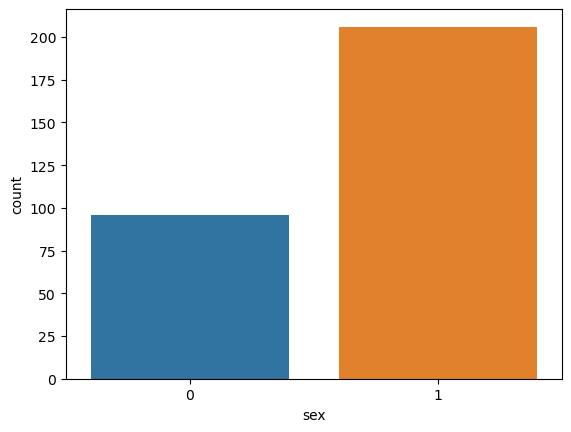

In [14]:
sns.countplot(df['sex'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

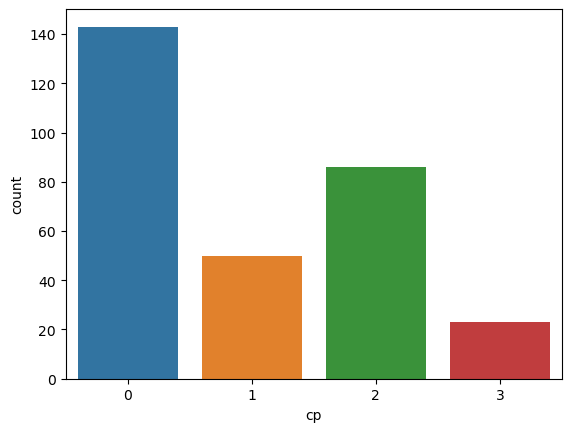

In [15]:
sns.countplot(df['cp'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='count'>

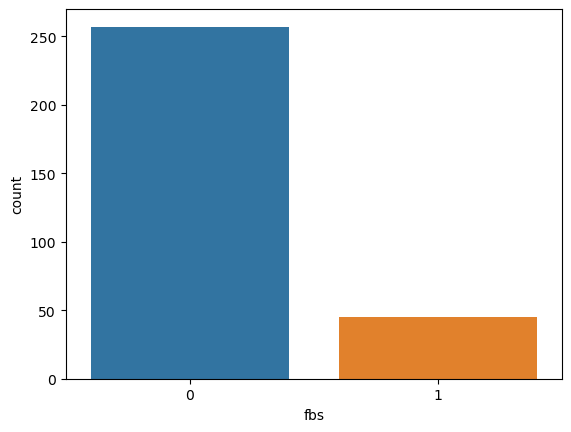

In [16]:
sns.countplot(df['fbs'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

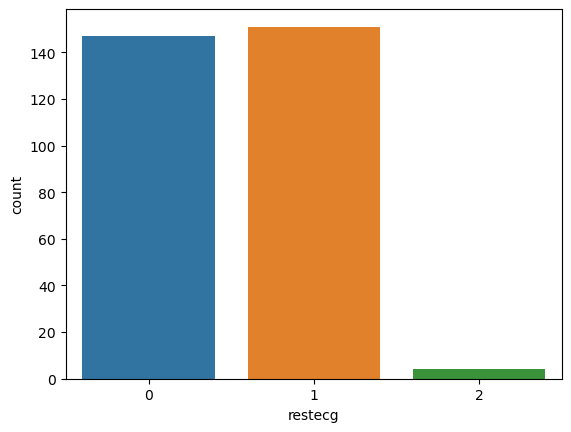

In [17]:
sns.countplot(df['restecg'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='count'>

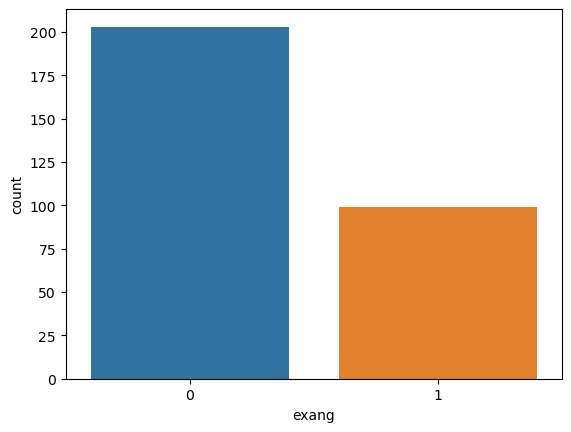

In [18]:
sns.countplot(df['exang'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='count'>

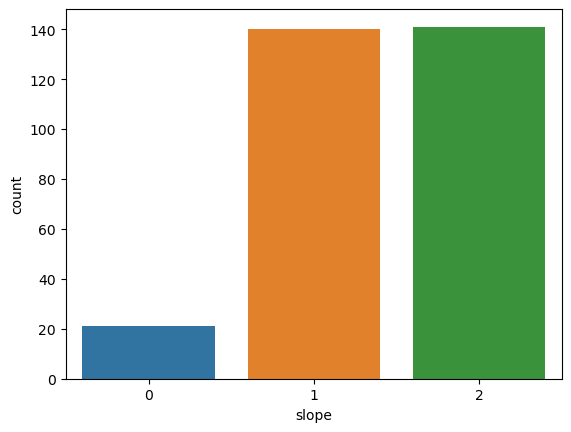

In [19]:
sns.countplot(df['slope'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

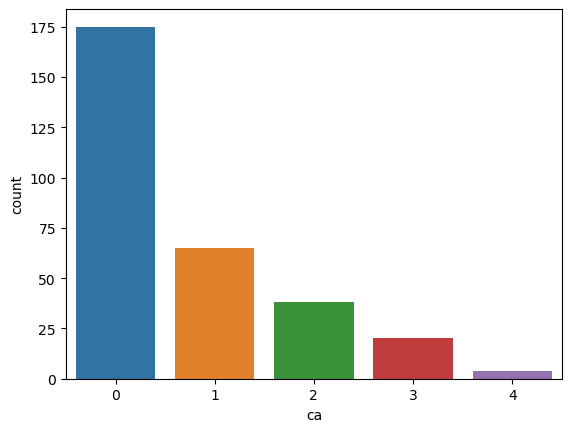

In [20]:
sns.countplot(df['ca'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

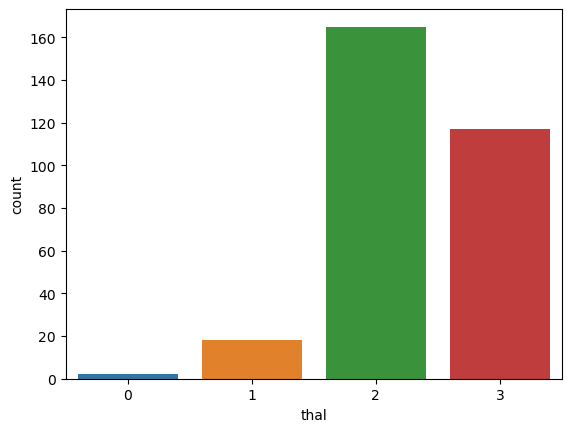

In [21]:
sns.countplot(df['thal'])

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

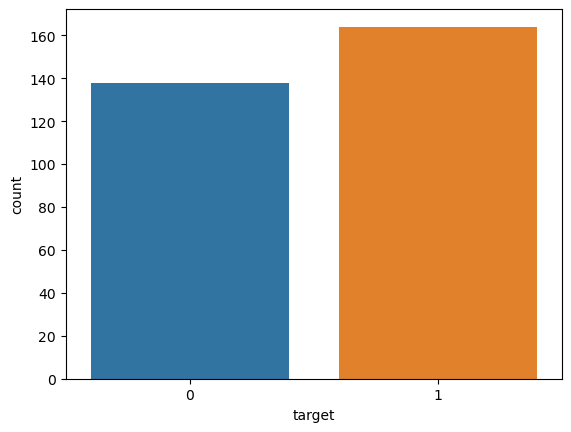

In [22]:
sns.countplot(df['target'])

# Bivariate analysis of catagorical data

In [23]:
# Cross-tabulation

for var in categorical_vars: 
    cross_tab = pd.crosstab(df[var], df['target']) 
    print(f'Cross-tabulation for {var}:\n{cross_tab}\n')


Cross-tabulation for sex:
target    0   1
sex            
0        24  72
1       114  92

Cross-tabulation for cp:
target    0   1
cp             
0       104  39
1         9  41
2        18  68
3         7  16

Cross-tabulation for fbs:
target    0    1
fbs             
0       116  141
1        22   23

Cross-tabulation for restecg:
target    0   1
restecg        
0        79  68
1        56  95
2         3   1

Cross-tabulation for exang:
target   0    1
exang          
0       62  141
1       76   23

Cross-tabulation for slope:
target   0    1
slope          
0       12    9
1       91   49
2       35  106

Cross-tabulation for ca:
target   0    1
ca             
0       45  130
1       44   21
2       31    7
3       17    3
4        1    3

Cross-tabulation for thal:
target   0    1
thal           
0        1    1
1       12    6
2       36  129
3       89   28

Cross-tabulation for target:
target    0    1
target          
0       138    0
1         0  164



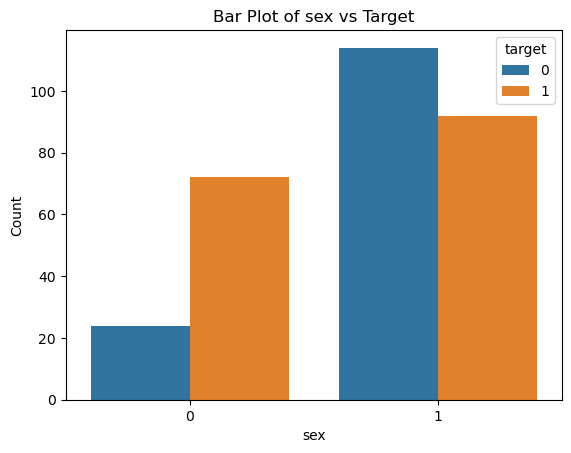

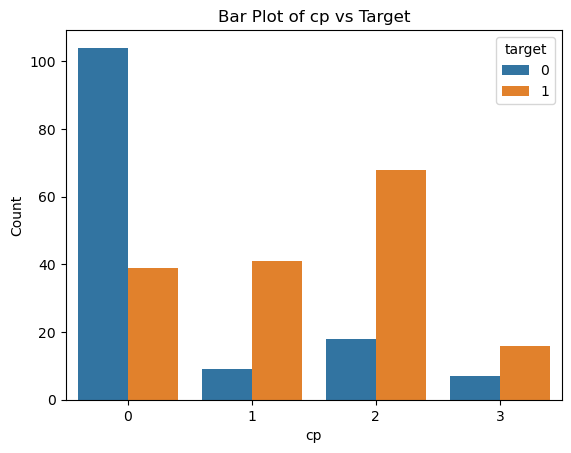

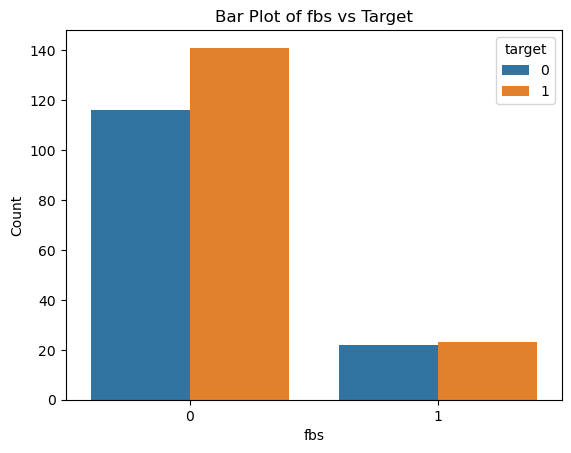

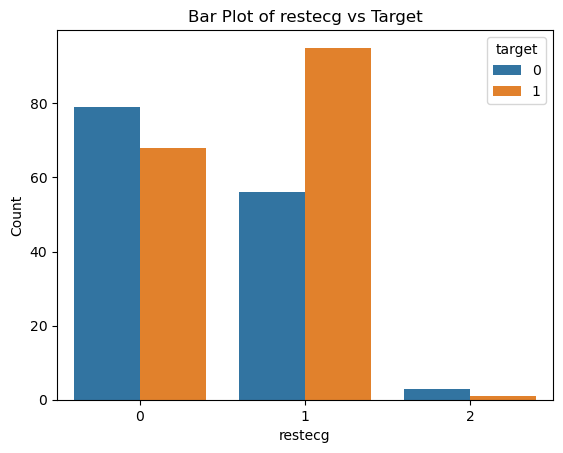

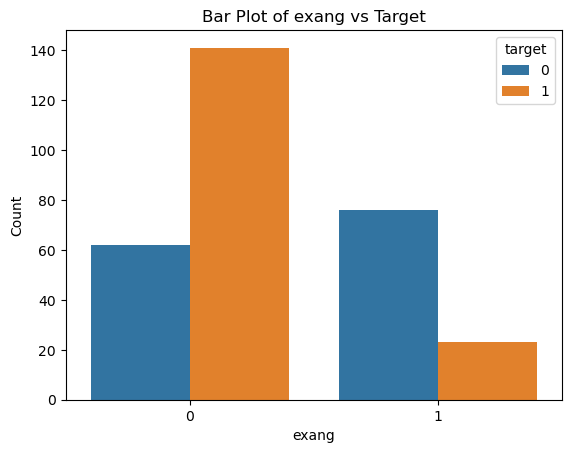

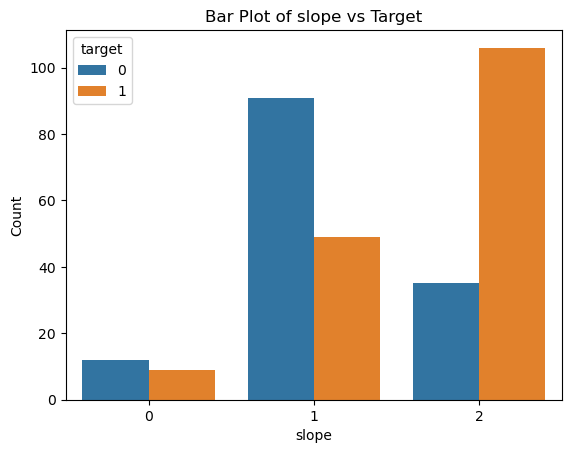

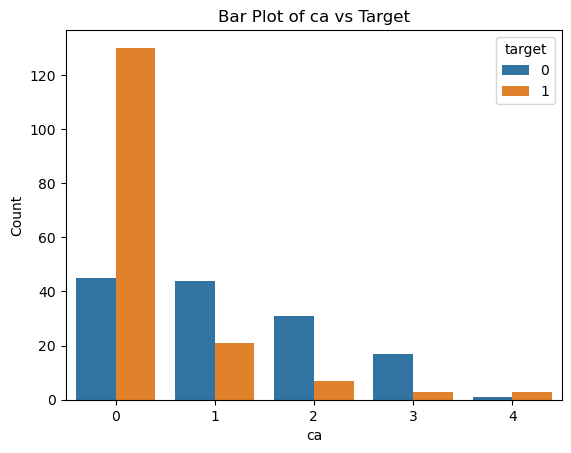

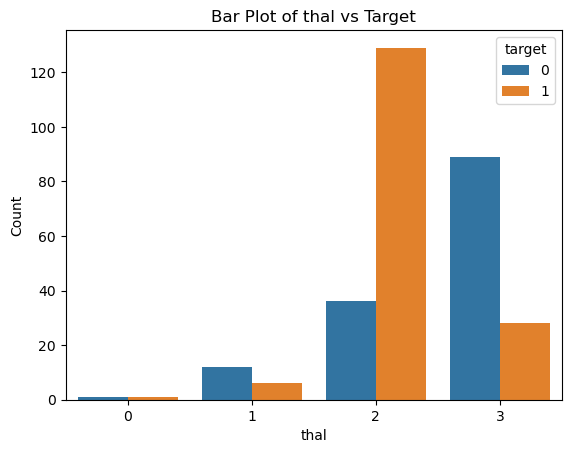

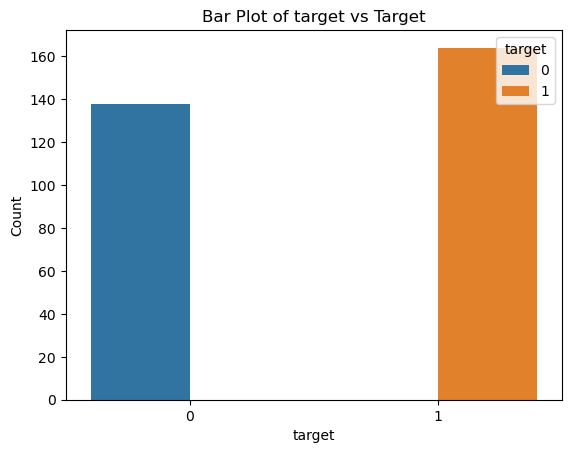

In [24]:
# Bar plot
    
for var in categorical_vars:
    sns.countplot(x=var, hue='target', data=df)
    plt.title(f'Bar Plot of {var} vs Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

# Multivariate analysis of catagorical data

In [25]:
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

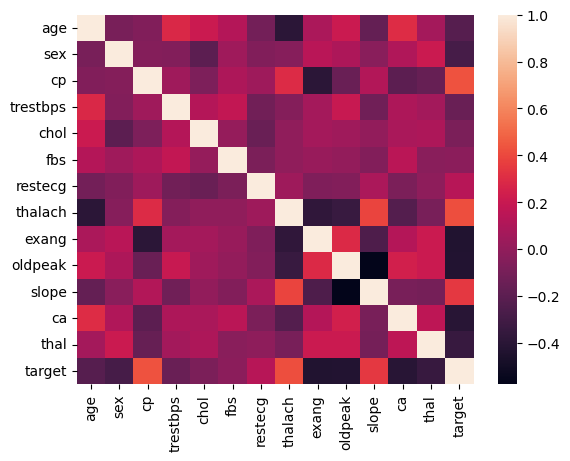

In [26]:
sns.heatmap(df.corr())

# occourance of CVD across age

In [27]:
age_cvd = df.groupby('age')['target'].mean().reset_index()
age_cvd

,age,target
0,29,1.000000
1,34,1.000000
2,35,0.500000
3,37,1.000000
4,38,0.500000
5,39,0.750000
6,40,0.333333
7,41,0.900000
8,42,0.875000
9,43,0.625000


Text(0, 0.5, 'Cardio Vascular Disease Occurrence')

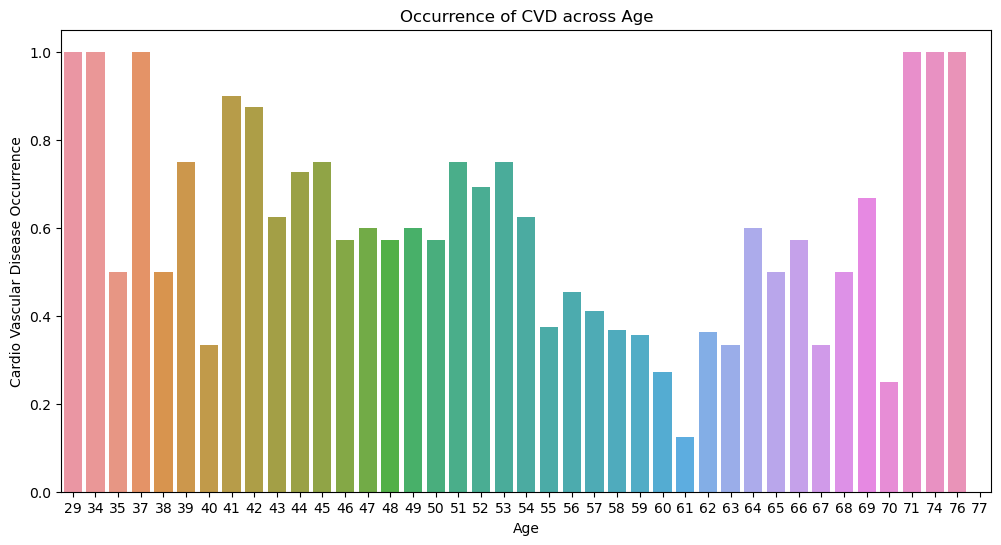

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='target', data=age_cvd)
plt.title('Occurrence of CVD across Age')
plt.xlabel('Age')
plt.ylabel('Cardio Vascular Disease Occurrence')

# Composition of all patients with respect to the Sex category


Text(0.5, 1.0, 'Count of frequency of Age on the basis of Sex')

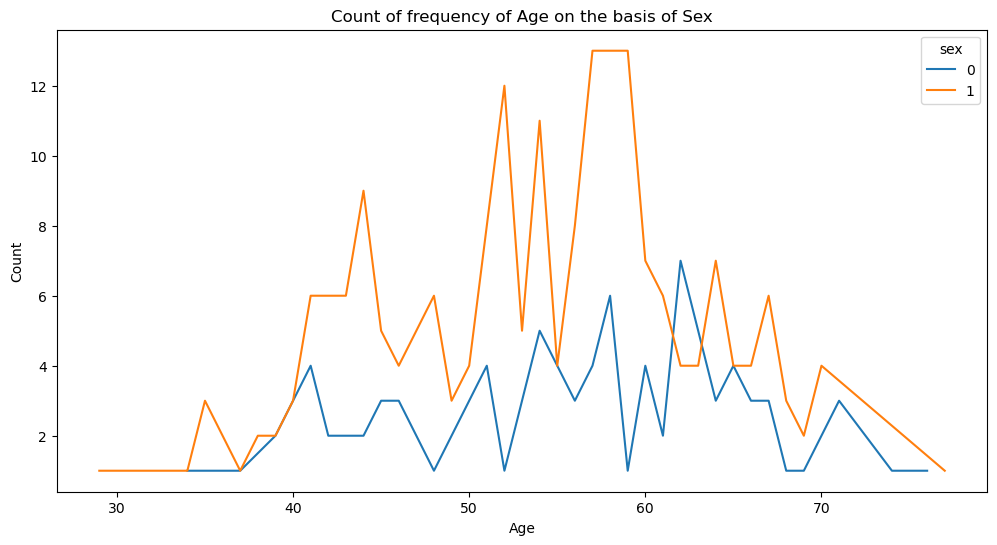

In [29]:
#Count of occourance of Age on the basis of Sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['age', 'sex']).size().reset_index(name='Count')
sns.lineplot(x='age', y='Count', hue='sex', data=df_grouped)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of frequency of Age on the basis of Sex')

Text(0.5, 1.0, 'Occurrence of CVD on the basis of Sex')

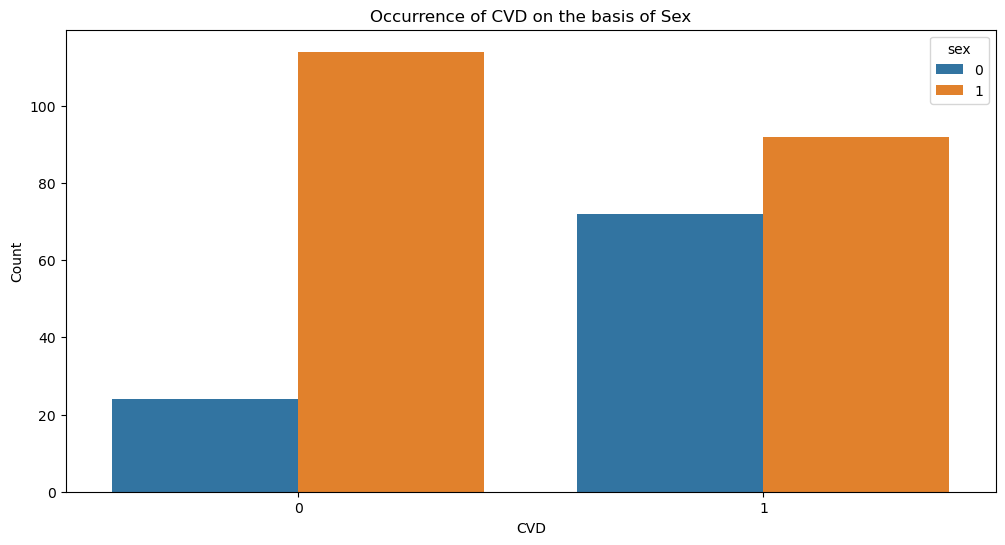

In [30]:
#Occurrence of CVD on the basis of Sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['target', 'sex']).size().reset_index(name='Count')
sns.barplot(x='target', y='Count', hue='sex', data=df_grouped)
plt.xlabel('CVD')
plt.ylabel('Count')
plt.title('Occurrence of CVD on the basis of Sex')

Text(0.5, 1.0, 'Occurrence of Thalassemia on the basis of Sex')

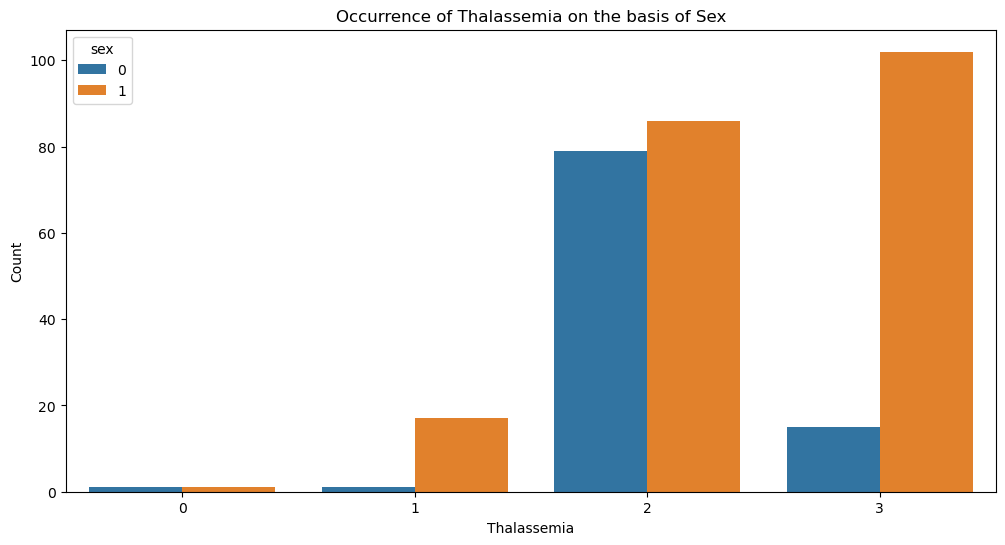

In [31]:
# thalassemia value vs sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['thal', 'sex']).size().reset_index(name='Count')
sns.barplot(x='thal', y='Count', hue='sex', data=df_grouped)
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.title('Occurrence of Thalassemia on the basis of Sex')

Text(0.5, 1.0, 'Occurrence of Chest pain on the basis of Sex')

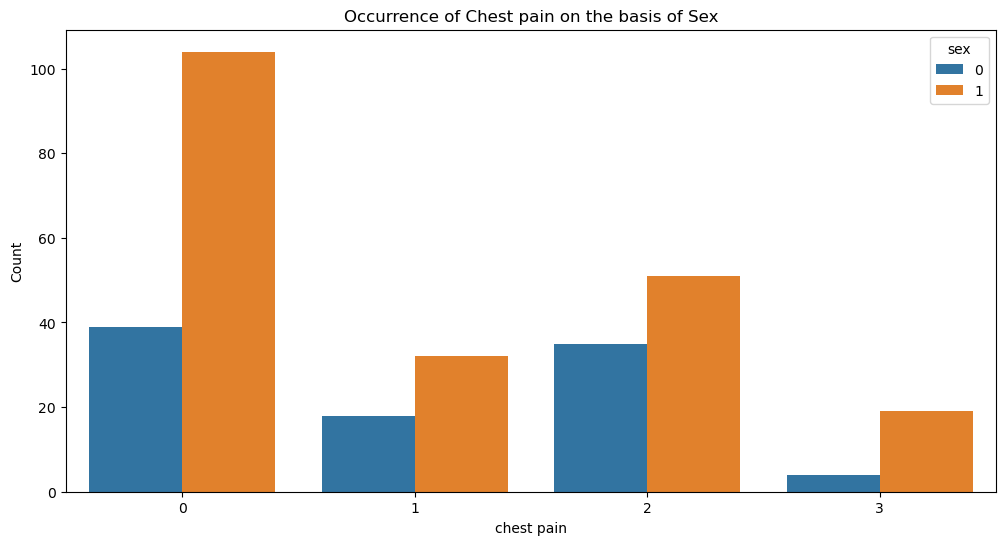

In [32]:
#Occurrence of Chestpain on the basis of Sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['cp', 'sex']).size().reset_index(name='Count')
sns.barplot(x='cp', y='Count', hue='sex', data=df_grouped)
plt.xlabel('chest pain')
plt.ylabel('Count')
plt.title('Occurrence of Chest pain on the basis of Sex')

Text(0.5, 1.0, 'result of Resting Blood Pressure on the basis of Sex')

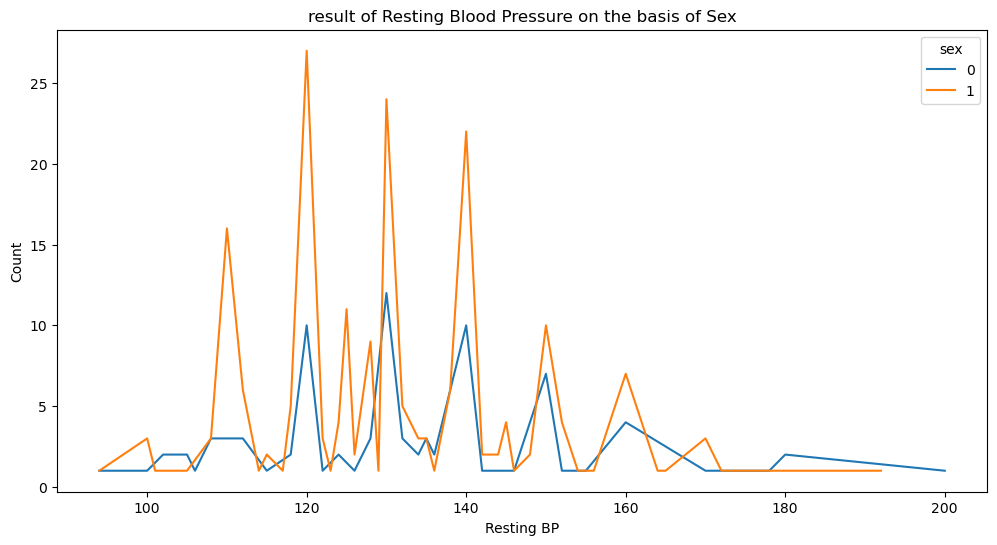

In [33]:
#results of Resting Blood pressure on the basis of Sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['trestbps', 'sex']).size().reset_index(name='Count')
sns.lineplot(x='trestbps', y='Count', hue='sex', data=df_grouped)
plt.xlabel('Resting BP')
plt.ylabel('Count')
plt.title('result of Resting Blood Pressure on the basis of Sex')

Text(0.5, 1.0, 'Cholestrol level on the basis of Sex')

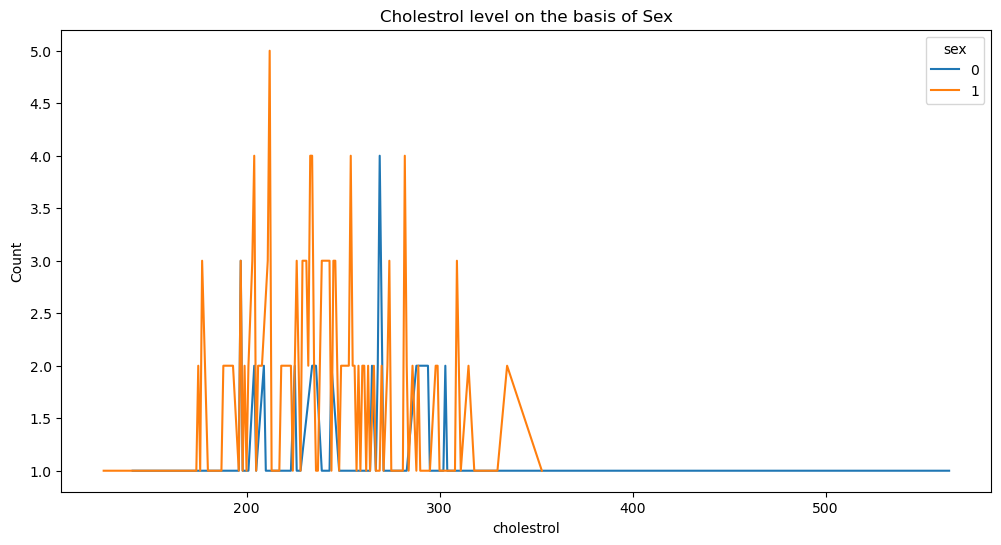

In [34]:
#Cholestrol level on the basis of Sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['chol', 'sex']).size().reset_index(name='Count')
sns.lineplot(x='chol', y='Count', hue='sex', data=df_grouped)
plt.xlabel('cholestrol')
plt.ylabel('Count')
plt.title('Cholestrol level on the basis of Sex')

Text(0.5, 1.0, 'Fasting Blood Pressure level on the basis of Sex')

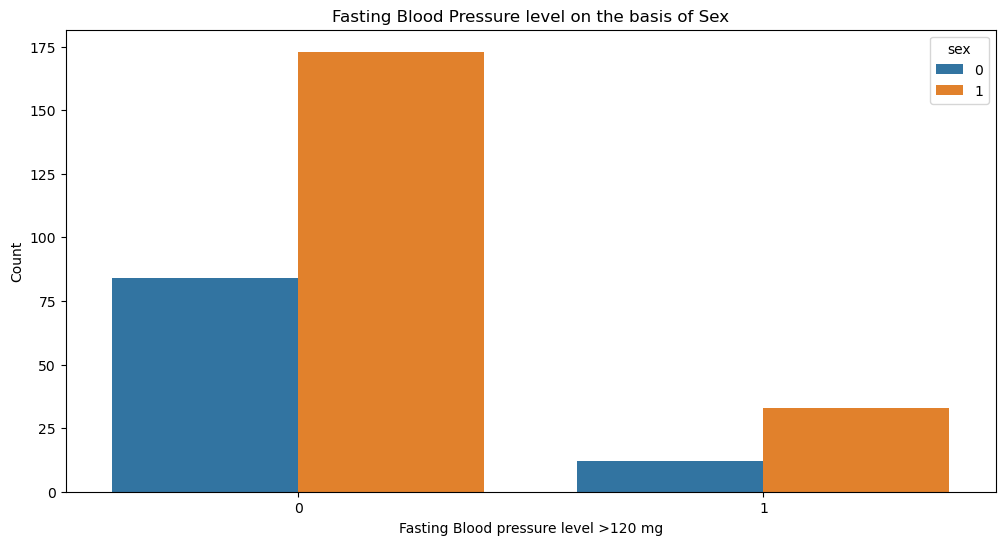

In [35]:
#Fasting BP on the basis of Sex

plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['fbs', 'sex']).size().reset_index(name='Count')
sns.barplot(x='fbs', y='Count', hue='sex', data=df_grouped)
plt.xlabel('Fasting Blood pressure level >120 mg')
plt.ylabel('Count')
plt.title('Fasting Blood Pressure level on the basis of Sex')

# Relationship between CVD and resting Blood Pressure

Text(0, 0.5, 'Target')

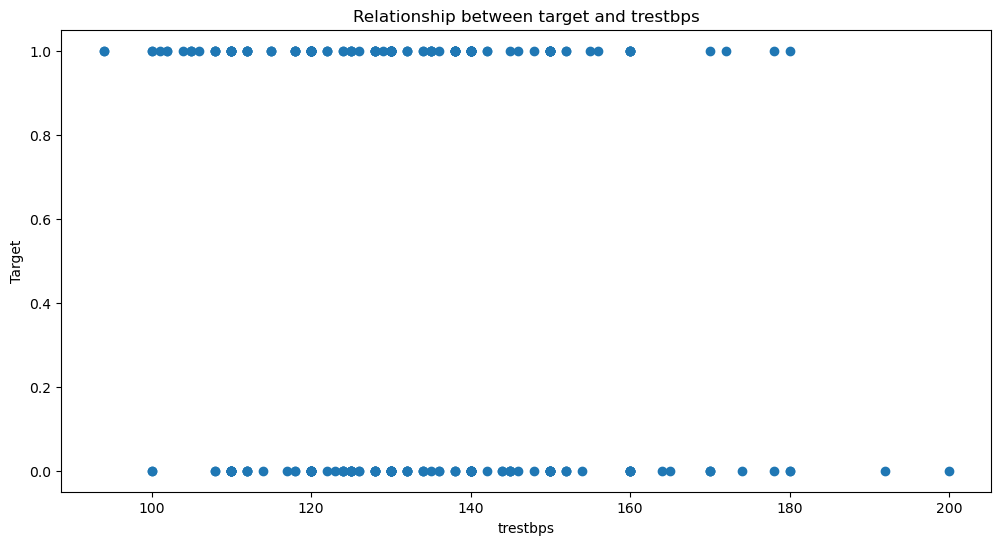

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(df['trestbps'], df['target'])
plt.title('Relationship between target and trestbps')
plt.xlabel('trestbps')
plt.ylabel('Target')


the scatterplot shows that there is no direct relation between resting blood pressure and a person having Heart disease.
The same can be confirmed using the heatmap plotted under multivariate anlysis. therefore this is not a good matric to determine the possibility of a person having a heart attack

# Relationship between cholesterol and Target

Text(0, 0.5, 'Target')

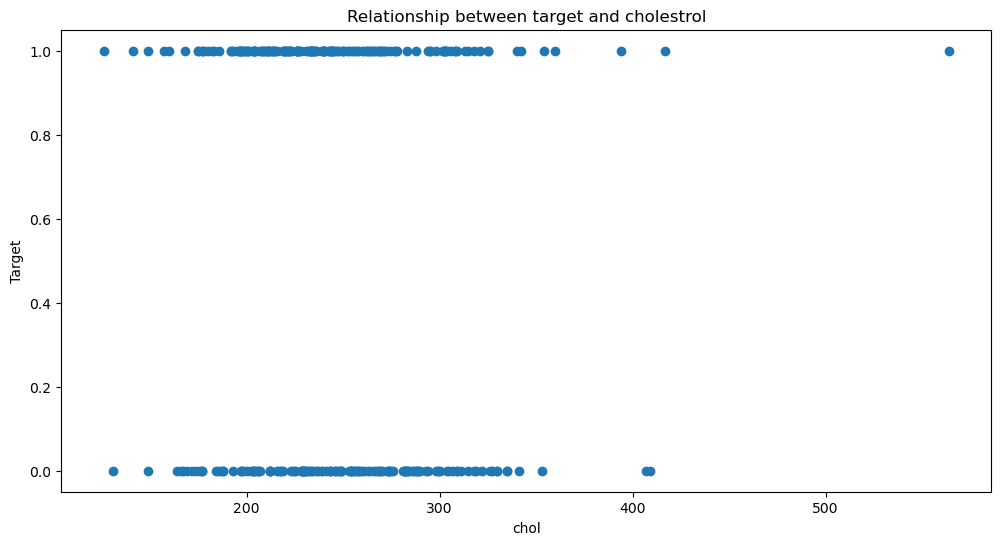

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(df['chol'], df['target'])
plt.title('Relationship between target and cholestrol')
plt.xlabel('chol')
plt.ylabel('Target')


the scatterplot shows that there is no direct relation between Cholestrol level and a person having Heart disease.
The same can be confirmed using the heatmap plotted under multivariate anlysis.however person having cholestrol level > 420 definately have a heart attack.

# Relationship between peak exercising and heart attack

<AxesSubplot:xlabel='target', ylabel='thalach'>

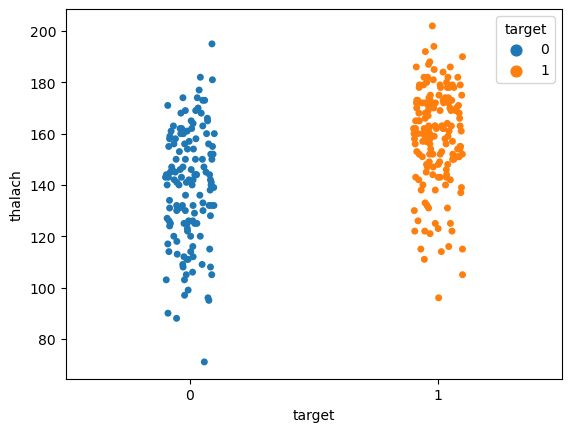

In [38]:
sns.stripplot(data=df, x="target", y="thalach", hue="target")

There is no direct relation between peak excercise other than the fact that people with 200+ of thalach are very likely to have a heart atack

# Relationship between thalesemia and CVD

In [39]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

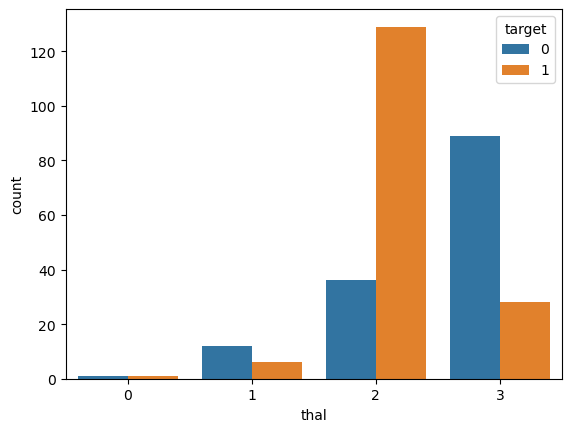

In [40]:
sns.countplot(df['thal'] ,hue = df['target'])

Thal Value 0: NULL.
Thal Value 1: fixed defect (no blood flow in some part of the heart).
Thal Value 2: normal blood flow.
Thal Value 3: reversible defect (a blood flow is observed but it is not normal).

Conclusion:

A person with no thalassemia has very even chances of CVD. A person with fixed defect is less likely to have a CVD .
A person with normal blood flow thalassemia is alot more likely to have CVD and a person with reversible defect is very unlikely to have CVD.

# Pairplot for understanding the relationship between all the variables

<Figure size 2000x2000 with 0 Axes>

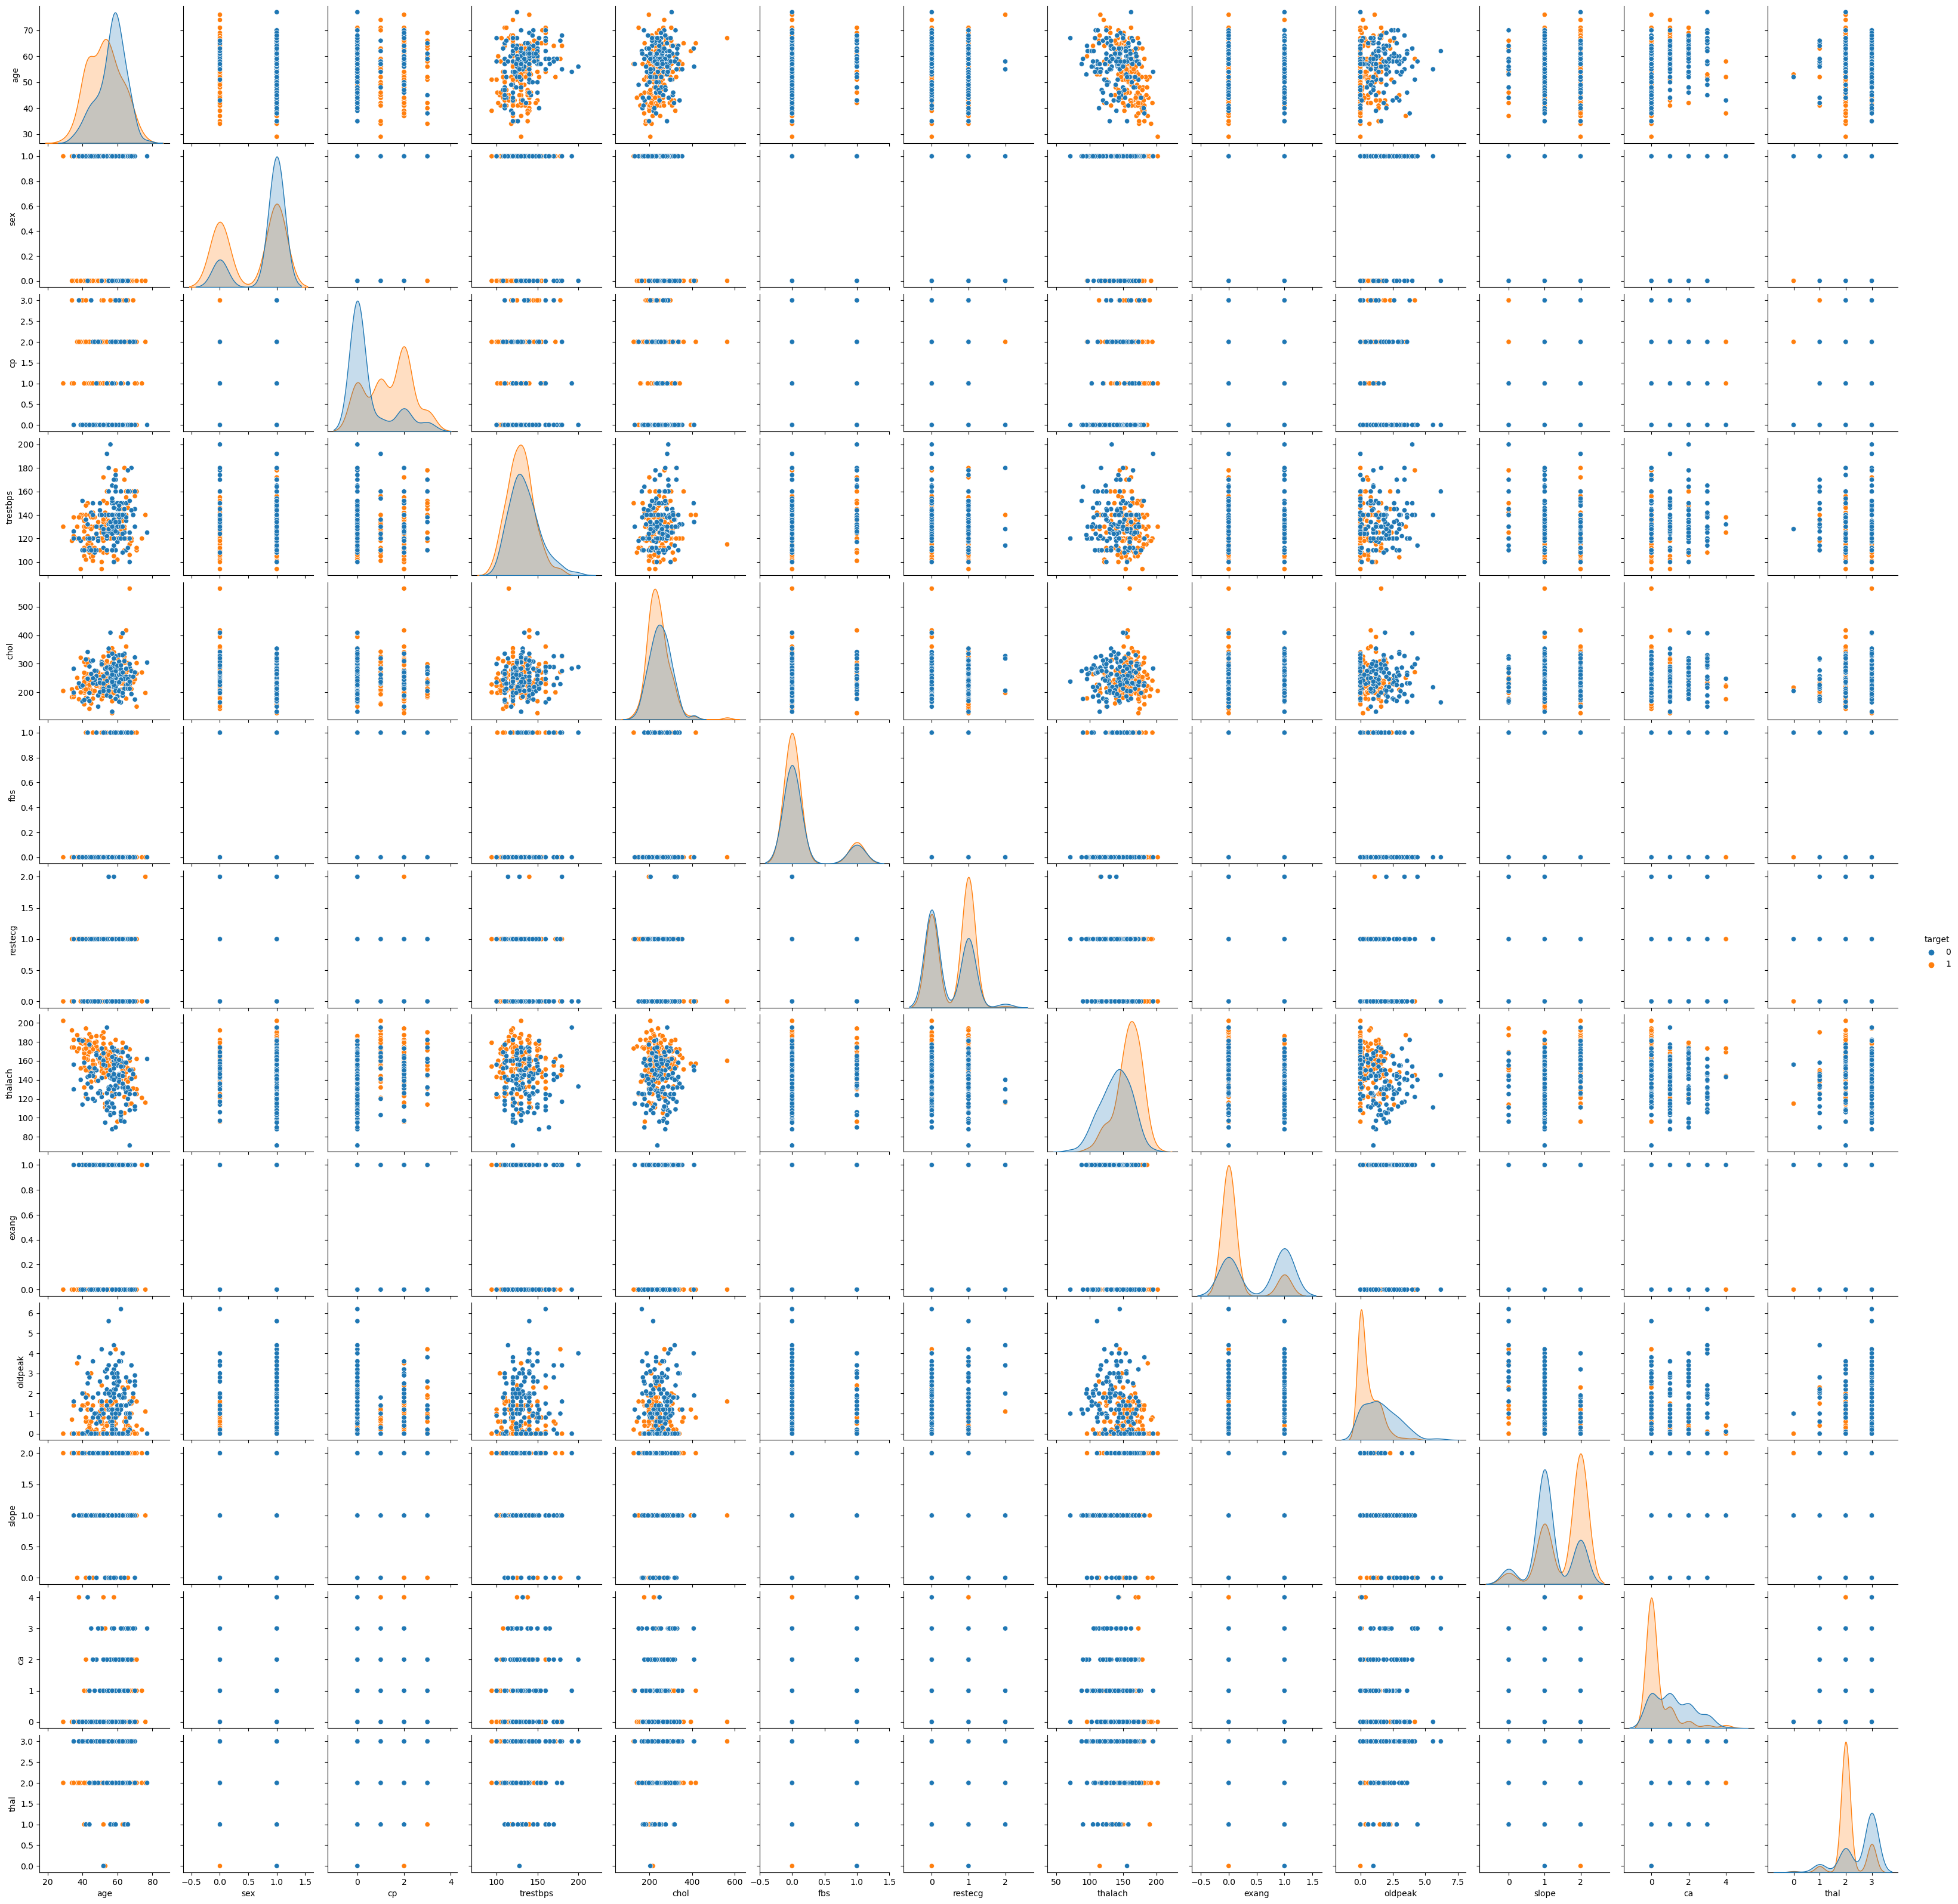

In [41]:
plt.figure(figsize=(20, 20))
sns.pairplot(df,hue = 'target')

# Model building

In [42]:
#Perform correlation analysis


correlation_matrix = df.corr(method='spearman')
correlation_matrix.to_csv('correlation_matrix.csv')

In [43]:
#Split the data into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#logistic regression model


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Results:
[[24  5]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



d:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#Train and evaluate the random forest model


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Results:
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [46]:
#Perform logistic regression with statsmodels for feature selection


X = sm.add_constant(X)  # Adding a constant term to the features
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


In [47]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4949
Time:                        13:08:13   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3042      2.578      1.282      0.200      -1.748       8.357
age           -0.0015      0.023     -0.063      0.950      -0.047       0.045
sex           -1.7509      0.468     -3.740      0.0